#### Surprise housing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the dataset
df = pd.read_csv("train.csv", keep_default_na=False)

# We are using keep_default_na = false since we have some categorical varaible with values 'NA' in the data set 
# which could be misinterprested as Null Values. We will handle this later in data cleaning part

In [5]:
# summary of the dataset
print(df.info())
# Total 81 columns , 1460 entries, no null-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [6]:
print(df.head())

   Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         

#### 1 Explain Data Dictionary


In [7]:
# After tunderstanding the data , and complaring with the current data types few columns data types ahs to be changed
#Columns MSSubClass, OverallQual, OverallCond are currently int type but actually categorical varaibles need to be converted to object type

df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

#Column LotFrontage and MasVnrArea needs to be converted to numeric type.
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

#### 2 Data CLeaning

#

We can see all the below columns are interpreted by pandas as having null values.
But, let us look at the actual meaening of some of the values of the below categorical column

LotFrontage  - Numerical  
Alley  - Categorical varaible. 'NA' means, No alley access
BsmtQual -  Categorical Variable. 'NA' means No Basement
BsmtCond - Categorical Variable. 'NA' means No Basement
BsmtExposure - Categorical Variable. 'NA' means No Basement
BsmtFinType1 - Categorical Variable. 'NA' means No Basement
BsmtFinType2 - Categorical Variable. 'NA' means No Basement
Electrical - Categorical variable . 'NA' missing value
FireplaceQu - Categorical Variable. 'NA' means No Fireplace
GarageType  - Categorical Variable. 'NA' means No Garage     
GarageYrBlt - Numerical Variable   
GarageFinish - Categorical Variable. 'NA' means No Garage
GarageQual - Categorical Variable. 'NA' means No Garage
GarageCond - Categorical Variable. 'NA' means No Garage
PoolQC - Categorical Variable. 'NA' means No Pool
Fence - Categorical Variable. 'NA' means No Fence
MiscFeature - Categorical Variable. 'NA' means No Misc features available

Hence in these categorical columns Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQual, Fence and MiscFeature the value 'NA' doesnt mean Null value

Lets u sreplace this with "Not avail"

In [8]:
## Replacing all 'NA' of all above mentioned columns by 'NotAvail'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "NotAvail")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NotAvail,Reg,Lvl,AllPub,...,0,NotAvail,NotAvail,NotAvail,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NotAvail,Reg,Lvl,AllPub,...,0,NotAvail,NotAvail,NotAvail,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NotAvail,IR1,Lvl,AllPub,...,0,NotAvail,NotAvail,NotAvail,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NotAvail,IR1,Lvl,AllPub,...,0,NotAvail,NotAvail,NotAvail,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NotAvail,IR1,Lvl,AllPub,...,0,NotAvail,NotAvail,NotAvail,0,12,2008,WD,Normal,250000


In [9]:
# Now lets check for null values in the data frame
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### 3 DATA EXLPORATION

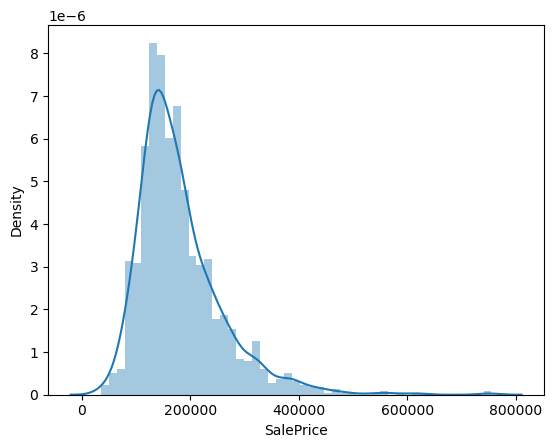

In [10]:
# target variable: Sale Price  of house follows almost a normal distribution
sns.distplot(df['SalePrice'])
plt.show()


In [11]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
print(df_numeric.columns)


Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [12]:
# Lets drop ID Column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
df_catgry = df.select_dtypes(include=['object'])
df_catgry.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [14]:
# Now lets see how the correlation between target variable to other Numeric varaibles
corr = df_numeric.corr()
corr


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


<Axes: >

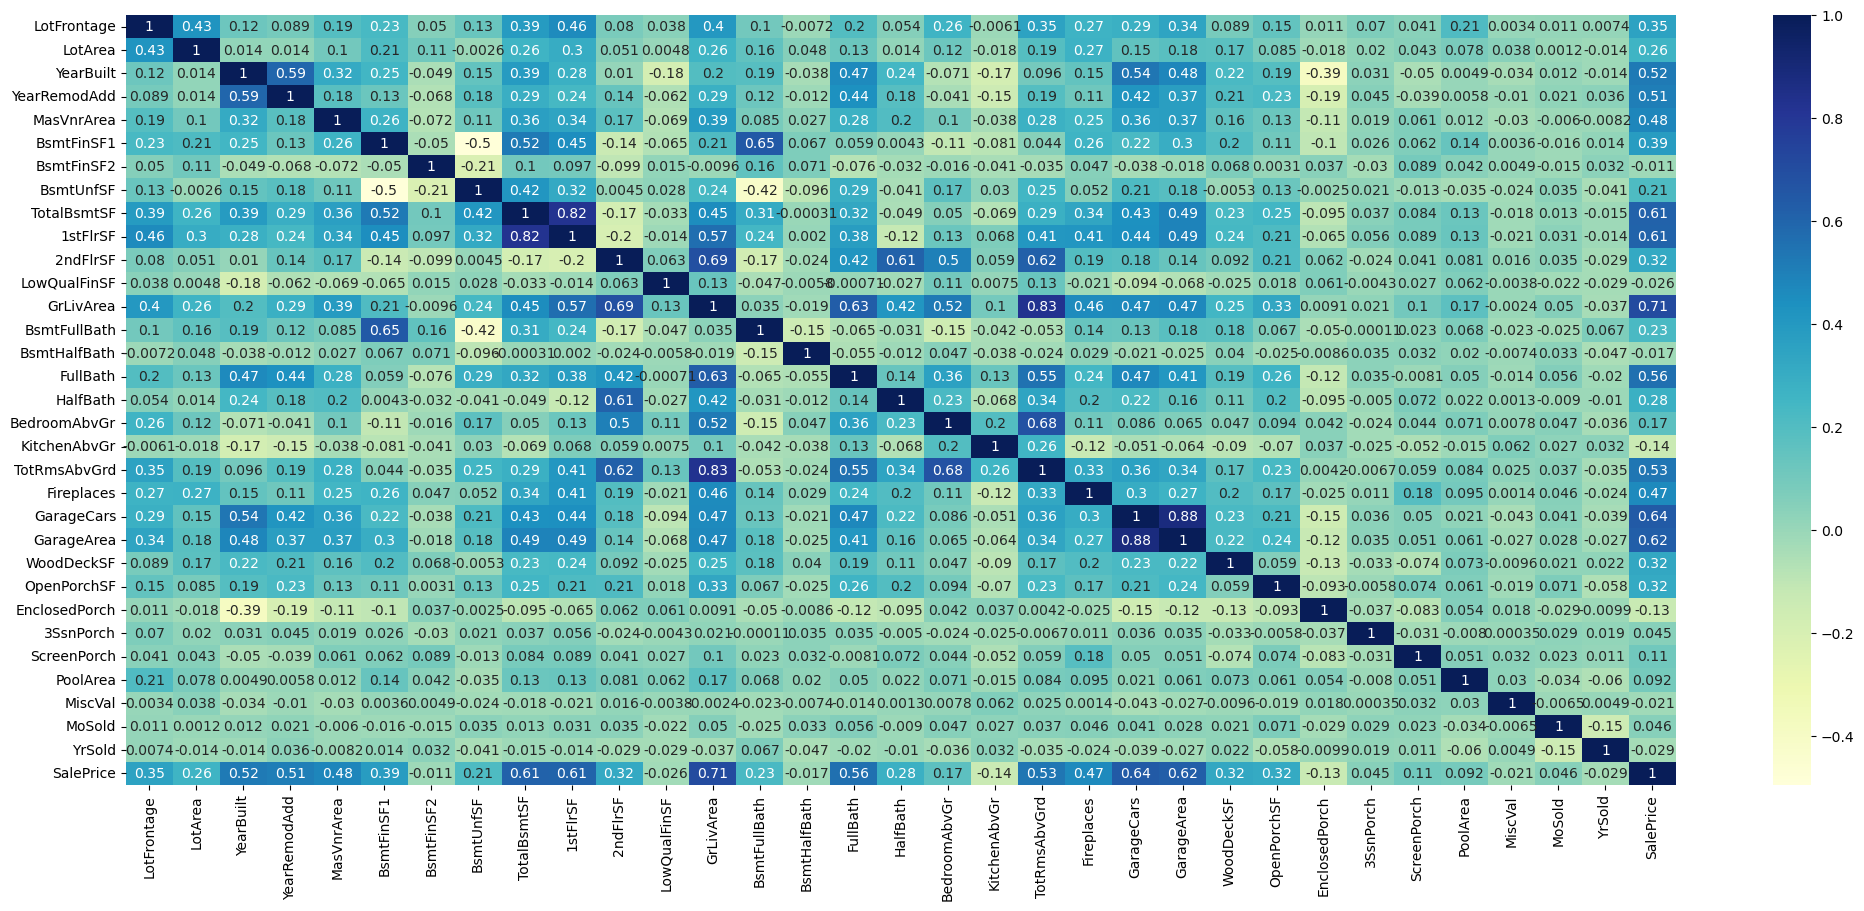

In [15]:
#Lets look at the heatmap for better visualization
plt.figure(figsize = (25, 10))
sns.heatmap(df_numeric.corr(),annot=True, cmap="YlGnBu")

Variables GrLivArea, GarageCars, GarageArea, TotalBsmtSF, FirststFlrSF are correlated more than 60% to SalesPrice
KitchenAbvGr and EnclosedPorch are negatively correlated to SalesPrice
We can also observe multicollinearity among many other predictor varaibles. Example : GarageArea and GarageCars

#### 4 DATA PREPARATION


##### 1 Dummies for categorical Varaibles

In [16]:
df_cat = df.select_dtypes(include='object')
df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
df = df.drop(df_cat, axis=1)
df.shape

(1460, 34)

In [18]:
df = pd.concat([df, df_cat_dummies], axis=1)
df.shape

(1460, 387)

##### 2. handling Null Values

In [19]:
df.isna().sum()


Id                         0
LotFrontage              259
LotArea                    0
YearBuilt                  0
YearRemodAdd               0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 387, dtype: int64

In [20]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df.isna().sum()

Id                       0
LotFrontage              0
LotArea                  0
YearBuilt                0
YearRemodAdd             0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 387, dtype: int64

##### 3. Treating Outliers in Numerical varaibles

In [21]:
df_num = df.select_dtypes(include=['int64', 'float64'])


In [22]:
print(df_num.shape)
print(df.shape)

(1460, 34)
(1460, 387)


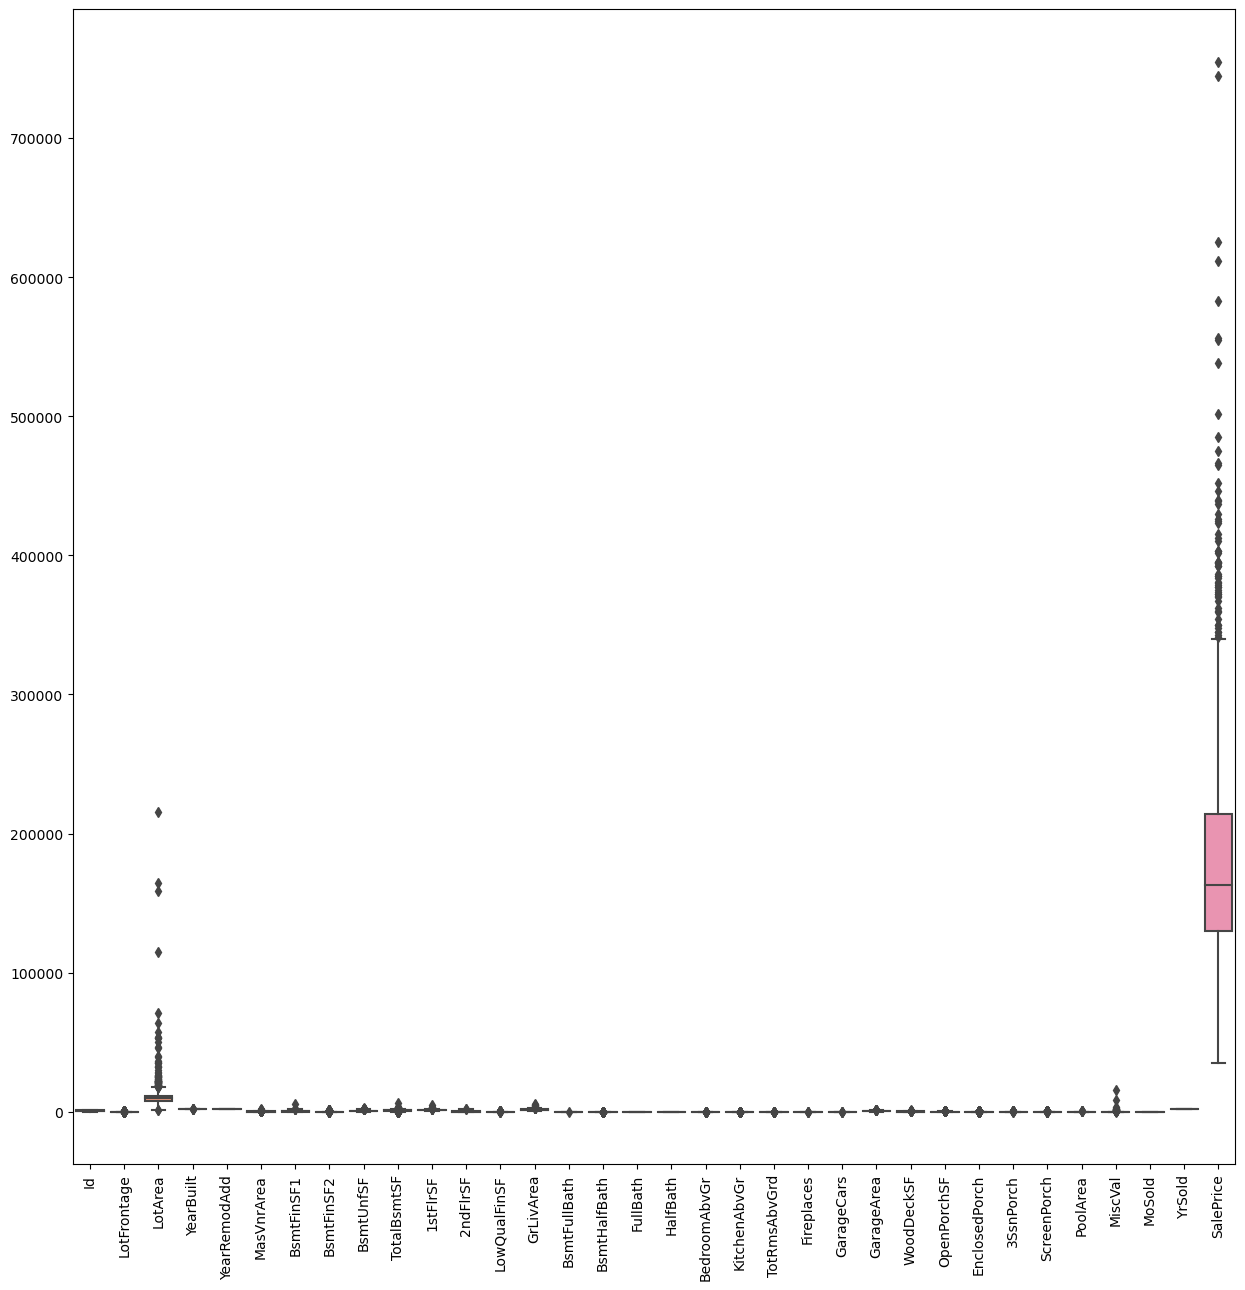

In [23]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [24]:
df = df.drop(df_num, axis=1)
df.shape

(1460, 353)

In [25]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

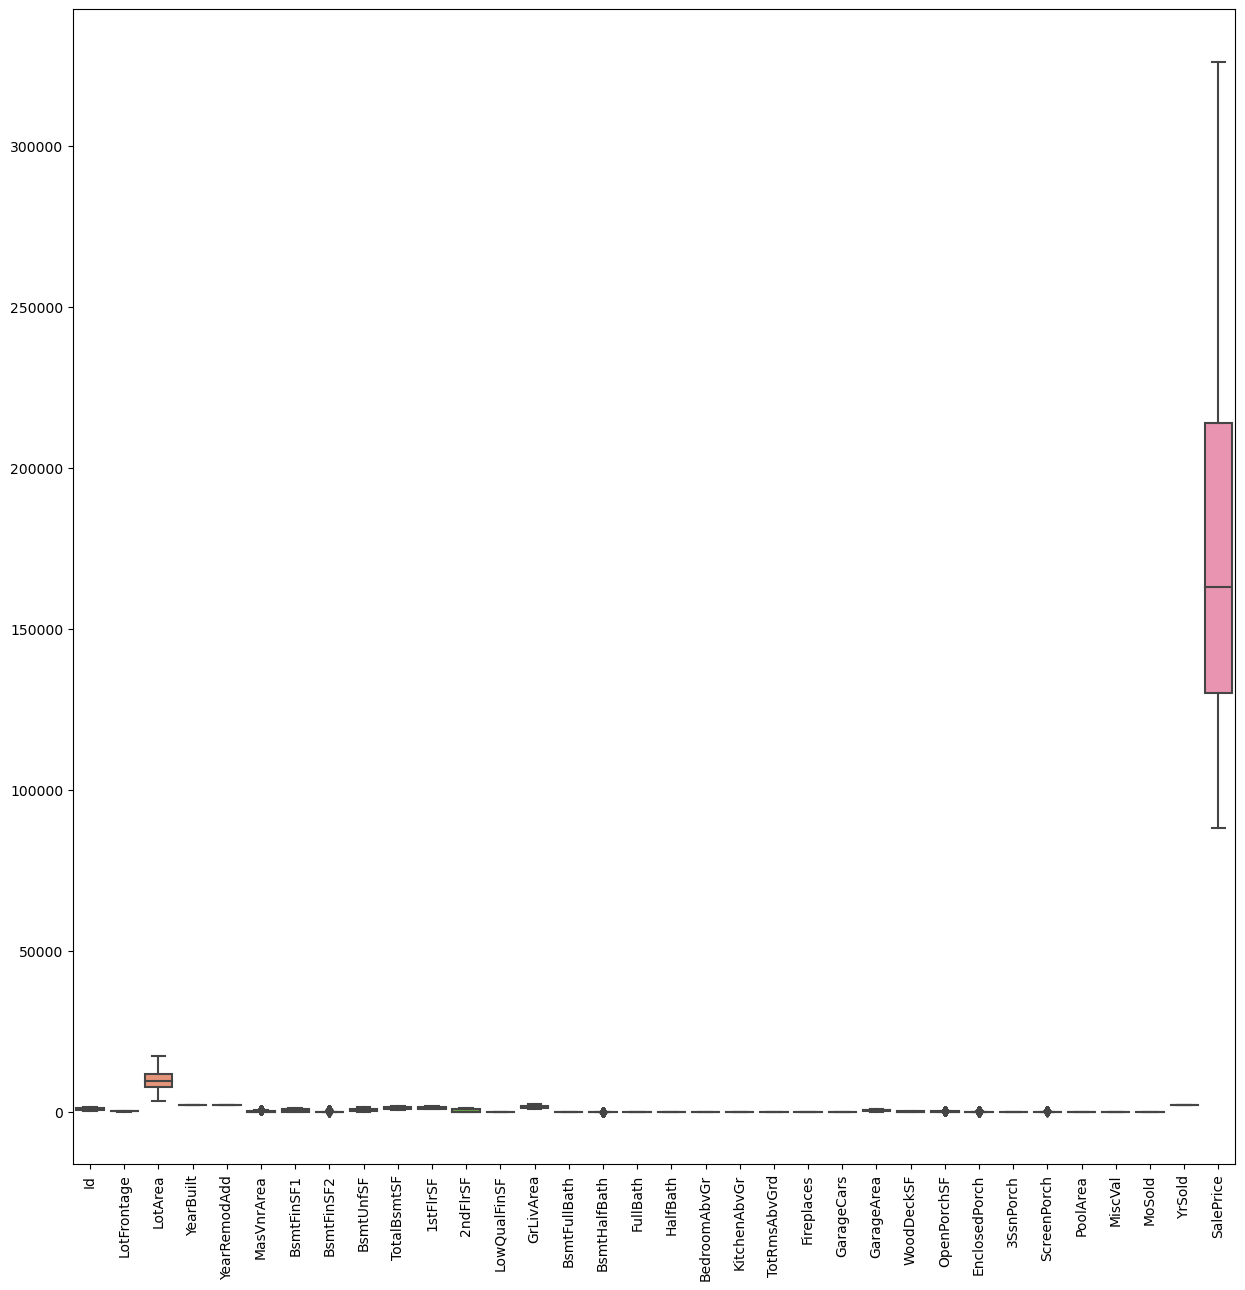

In [26]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [27]:
df = pd.concat([df, df_num], axis=1)
df.shape

(1460, 387)

#### BUILDING MODEL

In [28]:
# Separating X and Y
X = df.drop(["Id","SalePrice"], axis=1).copy()


In [29]:
Y = df["SalePrice"].copy()
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [30]:
# Scaling Numeric Varibales as scaling is very important for Ridge and Lasso Regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


num_cols = list(X.select_dtypes(include=['int64', 'float64']).columns)
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()



,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,0,1,0,0,0,0,0,...,0.644630,0.000000,0.348472,0.0,0.0,0.0,0.0,0.0,0.000000,0.50
1,0,0,0,0,0,0,0,0,0,0,...,0.541113,0.889552,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.25
2,0,0,0,0,1,0,0,0,0,0,...,0.715210,0.000000,0.239931,0.0,0.0,0.0,0.0,0.0,0.777778,0.50
3,0,0,0,0,0,1,0,0,0,0,...,0.755205,0.000000,0.199943,1.0,0.0,0.0,0.0,0.0,0.000000,0.00
4,0,0,0,0,1,0,0,0,0,0,...,0.983414,0.573134,0.479863,0.0,0.0,0.0,0.0,0.0,1.000000,0.50


In [31]:
# Splitting Data to test and train Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)       
print(Y_test.shape)                                             

(1021, 385)
(1021,)
(438, 385)
(438,)


In [32]:
# Lets now try fitting a LR model

lr = LinearRegression()

# Fit a line
lr.fit(X_train, Y_train)

LinearRegression()

In [33]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error



def calc_metrics(y_train, y_train_pred, y_test, y_pred):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2 TrainSet", '%.2f' % r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2 TestSet", '%.2f' % r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS TrainSet", '%.2f' % rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS TestSet", '%.2f' % rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE TrainSet", '%.2f' % mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE TestSet", '%.2f' % mse_test_lr)
    metric.append(mse_test_lr**0.5)

    rmse_train = mse_train_lr**0.5
    metric.append(rmse_train)
    print("RMSE TrainSet", '%.2f' % rmse_train)
    rmse_test = mse_test_lr**0.5
    metric.append(rmse_test)
    print("RMSE TestSet", '%.2f' % rmse_test)

    return metric

In [35]:
lr_metrics = calc_metrics(Y_train, y_pred_train, Y_test, y_pred_test)

R2 TrainSet 0.97
R2 TestSet -240097623234028568576.00
RSS TrainSet 141806686733.00
RSS TestSet 427184725795086766909029468864512.00
MSE TrainSet 138889996.80
MSE TestSet 975307593139467560910564884480.00
RMSE TrainSet 11785.16
RMSE TestSet 987576626464735.38


##### RIDGE REGRESSION

In [36]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [38]:
# Now we need to fit a Ridge Regression Model using this optimum value of alpha obtained
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge_coeffs = ridge.coef_
ridge_coeffs

array([-1.74327606e+03, -1.31205623e+02,  1.98774246e+03,  9.31794489e+02,
        1.69588035e+03,  2.59620469e+03,  4.63292395e+03, -1.83059978e+03,
       -1.32495540e+03, -7.50233117e+03, -3.84546165e+03, -6.38168780e+03,
       -3.38456844e+03, -7.28404981e+03,  4.78284158e+03,  4.10562790e+03,
        3.45638388e+03, -1.17004676e+03, -1.51185236e+03,  8.01050328e+02,
        2.00846125e+03,  1.14482290e+02, -2.50475152e+03,  3.10478463e+02,
        4.73300053e+03,  5.26039881e+03,  5.77480927e+03, -2.64645700e+03,
        6.13630513e+03, -4.31421187e+03, -9.44133525e+02,  6.89040302e+01,
        3.89872214e+03,  4.69715825e+03,  6.10075030e+02,  1.03675363e+03,
        2.32415679e+03,  7.25364433e+03, -4.59471243e+03,  1.50203677e+04,
       -1.24187242e+04, -2.33250505e+03, -1.45170355e+03, -7.71207864e+03,
       -8.76954391e+03, -8.59339449e+03,  1.91957183e+03, -5.87981014e+03,
        1.19872952e+04,  9.76389126e+03, -6.71476799e+03,  1.22854101e+03,
       -6.89841234e+03, -

In [39]:
# Now lets predict with Ridge Regression co-efficients
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


In [40]:
ridge_metrics = calc_metrics(Y_train, y_pred_train, Y_test, y_pred_test)

R2 TrainSet 0.95
R2 TestSet 0.89
RSS TrainSet 232205188847.00
RSS TestSet 191663707122.08
MSE TrainSet 227429176.15
MSE TestSet 437588372.42
RMSE TrainSet 15080.76
RMSE TestSet 20918.61


In [41]:
#### Plot Ridge Results 

##### LASSO REGRESSION

In [42]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
print(model_cv_lasso.best_params_)

{'alpha': 50}


In [44]:
#Fitting Lasso model for alpha = 50 and printing coefficients which have been penalised

alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=50)

In [45]:
lasso_coeffs = lasso.coef_
lasso_coeffs

array([ 0.00000000e+00,  0.00000000e+00,  6.46734870e+02,  0.00000000e+00,
        5.04640494e+02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.34554821e+04, -0.00000000e+00, -3.76679916e+03,
       -0.00000000e+00, -2.51762967e+03,  0.00000000e+00,  0.00000000e+00,
        6.70658179e+02, -2.54743753e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.40562335e+00,
        0.00000000e+00,  1.18875583e+03,  1.19662626e+03, -0.00000000e+00,
        4.58118124e+03, -2.89934517e+03, -0.00000000e+00,  0.00000000e+00,
        1.32324519e+03,  2.60160491e+03,  0.00000000e+00,  0.00000000e+00,
        3.25625453e+03,  8.04339509e+03, -2.08868265e+03,  1.93554056e+04,
       -9.05997662e+03, -0.00000000e+00, -0.00000000e+00, -1.00274661e+04,
       -8.25279345e+03, -6.54944479e+03,  0.00000000e+00, -4.78858247e+03,
        1.28600879e+04,  6.58486409e+03, -6.32911645e+03,  0.00000000e+00,
       -4.36617729e+03,  

In [46]:
# Now lets predict with Lasso Regression co-efficients
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [47]:
lasso_metrics = calc_metrics(Y_train, y_pred_train, Y_test, y_pred_test)

R2 TrainSet 0.95
R2 TestSet 0.85
RSS TrainSet 206821375616.68
RSS TestSet 259615248223.67
MSE TrainSet 202567458.98
MSE TestSet 592728877.22
RMSE TrainSet 14232.62
RMSE TestSet 24346.02


In [48]:
# Creating a table which contain all the metrics

pd.options.display.float_format = "{:,.2E}".format
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE(Train)','RMSE(Test)'], 
        'Linear Regression': lr_metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.67E-01,9.46E-01,9.52E-01
1,R2 Score (Test),-2.40E+20,8.92E-01,8.54E-01
2,RSS (Train),1.42E+11,2.32E+11,2.07E+11
3,RSS (Test),4.27E+32,1.92E+11,2.60E+11
4,MSE (Train),1.18E+04,1.51E+04,1.42E+04
5,MSE (Test),9.88E+14,2.09E+04,2.43E+04
6,RMSE(Train),1.18E+04,1.51E+04,1.42E+04
7,RMSE(Test),9.88E+14,2.09E+04,2.43E+04


We can observe that the R2 score on Train Data is almost same in Ridge and Lasso Regression. 
R-squared value on test data is 8.9 in Ridge Regression and 8.5 in Lasso Regression

In [49]:
# Lets check the coefficients after Regression
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas.shape

(385, 0)

In [50]:
betas ['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
MSSubClass_30,-1.74E+03,0.00E+00
MSSubClass_40,-1.31E+02,0.00E+00
MSSubClass_45,1.99E+03,6.47E+02
MSSubClass_50,9.32E+02,0.00E+00
MSSubClass_60,1.70E+03,5.05E+02
...,...,...
ScreenPorch,1.27E+03,0.00E+00
PoolArea,0.00E+00,0.00E+00
MiscVal,0.00E+00,0.00E+00
MoSold,1.35E+03,1.19E-03


We can see from the above list that both Ridge and Lasso Regression has minimized the coefficient

Lasso Regression has reduced some of the coefficients to zero

Lets look at how Lasso has done feature selection. Lets check the features removed by Lasso

In [51]:
betas[betas['Lasso']==0].shape
# Lasso has removed 231 features out of 385 features

(231, 2)

In [52]:
# Let us look at the features selected by Lasso
features_Lasso = betas.loc[betas['Lasso']!=0, 'Lasso']
print(features_Lasso.shape)
features_Lasso

(154,)


MSSubClass_45     6.47E+02
MSSubClass_60     5.05E+02
MSSubClass_90    -1.35E+04
MSSubClass_160   -3.77E+03
MSSubClass_190   -2.52E+03
                    ...   
GarageArea        2.17E+04
WoodDeckSF        5.88E+03
OpenPorchSF       2.33E+03
MoSold            1.19E-03
YrSold           -8.66E+02
Name: Lasso, Length: 154, dtype: float64

#### Inference about critical Predictors to the firm

In [53]:
# Lets look at top 10 predictors based on both Ridge and Lasso base of the beta values

ridge_predictors = betas['Ridge'].sort_values(ascending=False)[:10]
ridge_predictors


GrLivArea              3.52E+04
OverallQual_9          2.68E+04
TotalBsmtSF            2.35E+04
OverallQual_8          1.91E+04
2ndFlrSF               1.91E+04
1stFlrSF               1.74E+04
OverallCond_9          1.65E+04
GarageArea             1.64E+04
Neighborhood_Crawfor   1.50E+04
LotArea                1.45E+04
Name: Ridge, dtype: float64

In [54]:
# Lets look at top 10 predictors based on both Ridge and Lasso base of the beta values

lasso_predictors = betas['Lasso'].sort_values(ascending=False)[:10]
lasso_predictors


GrLivArea              6.77E+04
OverallQual_9          4.38E+04
OverallCond_9          3.39E+04
TotalBsmtSF            3.21E+04
OverallQual_8          2.88E+04
YearBuilt              2.46E+04
Condition2_PosA        2.17E+04
GarageArea             2.17E+04
Neighborhood_Crawfor   1.94E+04
Exterior1st_BrkFace    1.74E+04
Name: Lasso, dtype: float64

Optimum value of alpha 
    Ridge Regression = 8.0
    Lasso Regression = 50
Variables Significant in Predicting House Price are

GrLivArea              
OverallQual_9          
TotalBsmtSF            
OverallQual_8          
2ndFlrSF               
1stFlrSF               
OverallCond_9
GarageArea             
Neighborhood_Crawfor   
LotArea    
YearBuilt
Condition2_PosA
Exterior1st_BrkFace          

#### FOR SUBJECTIVE QUESTIONS


#### SUBJECTIVE QUESTIONS WORKOUT

In [58]:
# Question 1. Double the alpha value

ridge2 = Ridge(alpha=16)
ridge.fit(X_train, Y_train)

Ridge(alpha=8)

In [59]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [ ]:
ridge_metrics = calc_metrics(Y_train, y_pred_train, Y_test, y_pred_test)